<a href="https://colab.research.google.com/github/RAHULRAJ666DX/Main_Projects/blob/main/Correlation_Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Correlation Project**

In [654]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import missingno as mg
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [ ]:
from google.colab import drive     
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [655]:
# Now we need to read in the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Movies Correlation Project/movies.csv')

In [657]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [658]:
df.shape

(7668, 15)

In [659]:
# Checking Null Values in each column
df.isnull().sum().sort_values(ascending=False)[:11].reset_index()

,index,0
0,budget,2171
1,gross,189
2,rating,77
3,company,17
4,runtime,4
5,score,3
6,votes,3
7,writer,3
8,country,3
9,released,2


In [660]:
# Checking missing data percentage
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))


name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [661]:
df.dtypes.reset_index()

,index,0
0,name,object
1,rating,object
2,genre,object
3,year,int64
4,released,object
5,score,float64
6,votes,float64
7,director,object
8,writer,object
9,star,object


In [ ]:
df['budget'] = df['budget'].astype("Int64")
df['gross'] = df['gross'].astype("Int64")
df['runtime'] = df['runtime'].astype("Int64")
df['votes'] = df['votes'].astype("Int64")

In [662]:
df.shape

(7668, 15)

In [663]:
# No duplicate values
df.duplicated().value_counts().reset_index()

,index,0
0,False,7668


## **Box Plot for checking for Outliers**

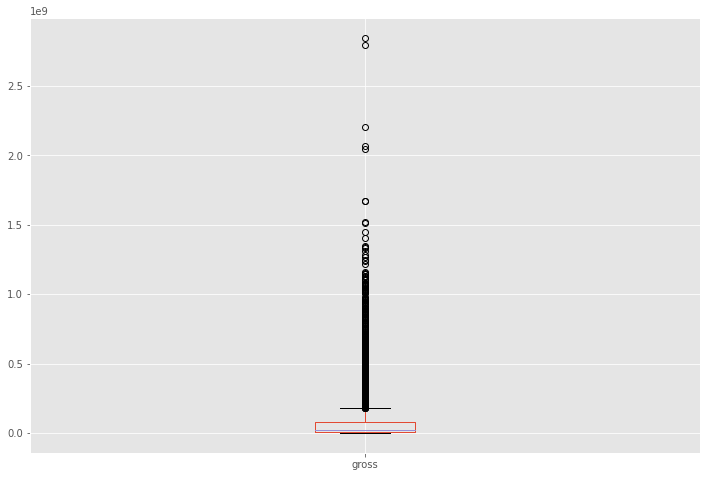

In [668]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [675]:
pd.set_option('display.max_rows',20)

In [676]:
df.sort_values(by=['gross'],inplace=False,ascending=False)
# df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [677]:
df.shape

(7668, 15)

## **Scatter Plot for Gross and Budget**

Text(0, 0.5, 'Gross')

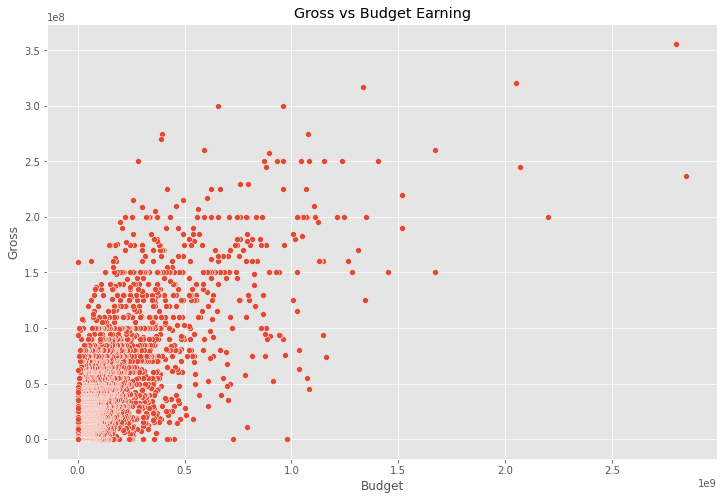

In [ ]:
sns.scatterplot(x=df['gross'],y=df['budget'])
plt.title('Gross vs Budget Earning')
plt.xlabel('Budget')
plt.ylabel('Gross')

## **Regplot for Gross vs Budget**

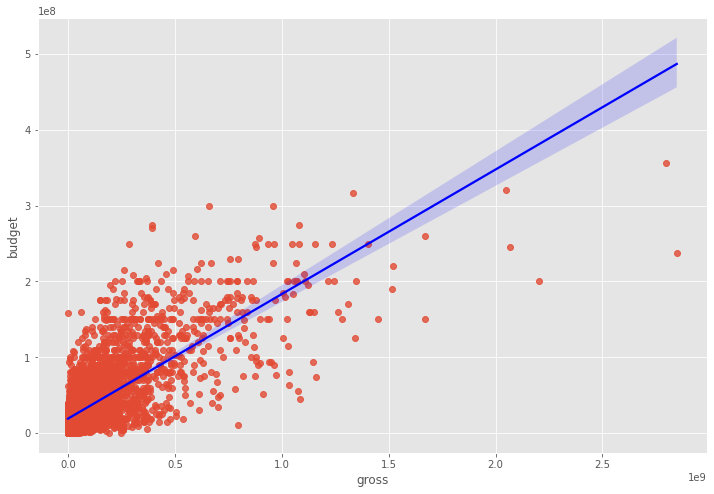

In [679]:
sns.regplot(x="gross", y="budget", data=df,line_kws={'color':'blue'})

In [ ]:
df=df.fillna(0)

## **Regplot for score and gross**

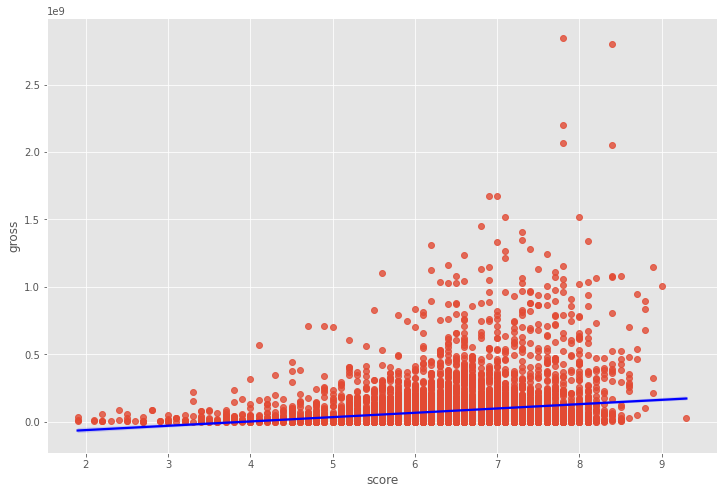

In [682]:
sns.regplot(x="score", y="gross", data=df,dropna = True,line_kws={'color':'blue'})
# sns.regplot(x="gross", y="budget", data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"},dropna = True)

In [ ]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         Int64
director     object
writer       object
star         object
country      object
budget        Int64
gross         Int64
company      object
runtime       Int64
dtype: object

In [ ]:
sns.regplot(x="gross", y="budget", data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"},dropna = True)

## **Checking Correlation for 'pearson', 'kendall', 'spearman' methods**

In [684]:
#checking correlation 
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [685]:
df.corr(method ='kendall')


,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


In [686]:
df.corr(method ='spearman')


,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000


## **Correlation Heatmap**

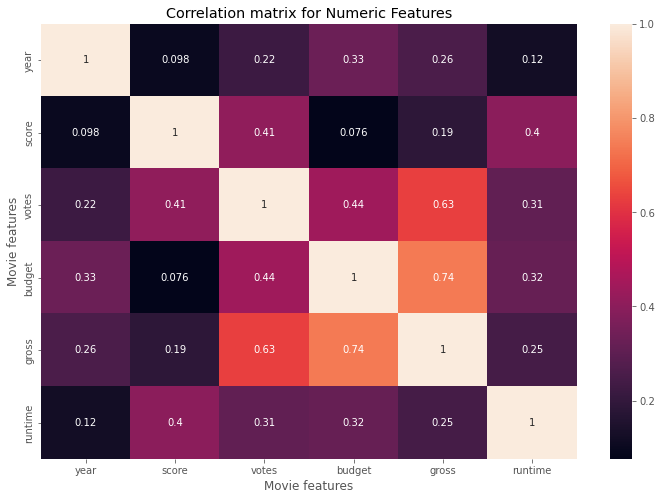

In [687]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

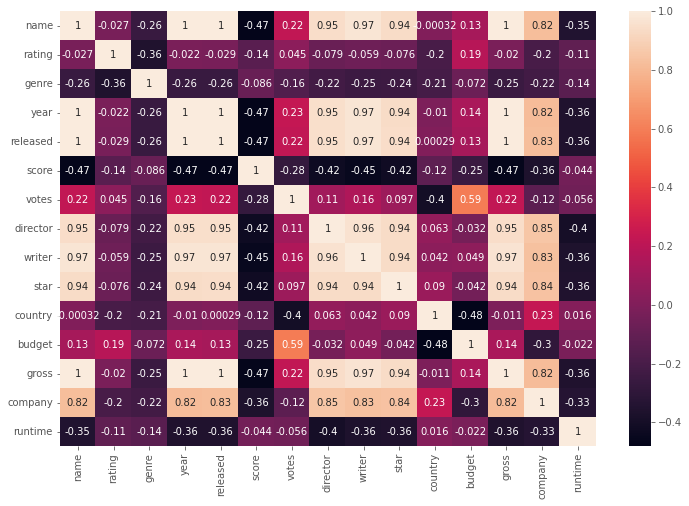

In [688]:
sns.heatmap(df_factorized.corr(method='pearson'),annot=True)

## **Company is not a numeric value we can convert it**

In [691]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df_factorized1 = df.apply(lambda x: x.factorize()[0])
df_factorized1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1
2,2,1,2,0,2,2,2,2,2,2,1,2,2,2,2
3,3,1,3,0,1,3,3,3,3,3,1,3,3,3,3
4,4,0,3,0,3,4,4,4,4,4,1,4,4,4,4


In [692]:
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## **Correlation cannot work unless its a Categorical Variable so Converting Data types of columns from Object type to 'category' type**

In [693]:
df_numerized = df 
for col_name in df_numerized:
  if(df_numerized[col_name].dtype =='object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes
    

In [694]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


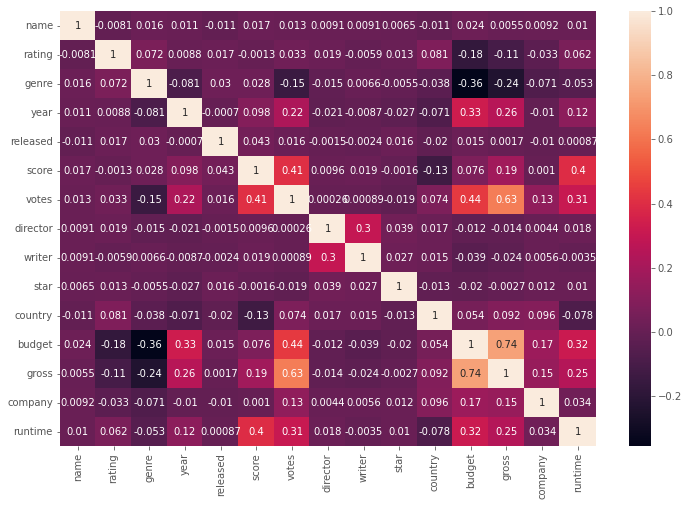

In [695]:
sns.heatmap(df_numerized.corr(method='pearson'),annot=True)

In [696]:
df_factorized1 = df.apply(lambda x: x.factorize()[0])

In [697]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.154269
         genre       0.036367
         year        0.965761
         released    0.959855
                       ...   
runtime  country     0.122181
         budget      0.112097
         gross       0.042978
         company     0.005232
         runtime     1.000000
Length: 225, dtype: float64


In [698]:
pd.set_option('display.max_rows', 30)
sorted_pairs = corr_pairs.sort_values()
print(sorted_pairs)

budget   company   -0.092495
company  budget    -0.092495
genre    rating    -0.091898
rating   genre     -0.091898
budget   country   -0.082974
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [699]:
pd.set_option('display.max_rows', 20)
sorted_pairs[(sorted_pairs) > 0.5]

company   star       0.527363
star      company    0.527363
company   writer     0.547126
writer    company    0.547126
director  company    0.552420
                       ...   
year      year       1.000000
genre     genre      1.000000
rating    rating     1.000000
company   company    1.000000
runtime   runtime    1.000000
Length: 71, dtype: float64

In [700]:
# We can now take a look at the ones that have a high correlation (> 0.5)
pd.set_option('display.max_rows', None)
strong_pairs = sorted_pairs[(sorted_pairs) > 0.5]
print(strong_pairs)

company   star        0.527363
star      company     0.527363
company   writer      0.547126
writer    company     0.547126
director  company     0.552420
company   director    0.552420
          gross       0.587727
gross     company     0.587727
name      company     0.591834
company   name        0.591834
          year        0.601720
year      company     0.601720
released  company     0.607607
company   released    0.607607
writer    star        0.676284
star      writer      0.676284
          director    0.682358
director  star        0.682358
star      name        0.731509
name      star        0.731509
star      gross       0.735612
gross     star        0.735612
director  name        0.745905
name      director    0.745905
writer    director    0.748875
director  writer      0.748875
gross     director    0.750911
director  gross       0.750911
released  star        0.755408
star      released    0.755408
year      star        0.756341
star      year        0.756341
year    

### **Year has very High correlation with Released with 0.9940**

In [701]:
# Looking at the top 15 compaies by gross revenue

In [702]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [703]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [704]:
df[['company','gross']]

,company,gross
0,2319,4.699877e+07
1,731,5.885311e+07
2,1540,5.383751e+08
3,1812,8.345354e+07
4,1777,3.984634e+07
5,1812,3.975460e+07
6,2281,1.152299e+08
7,631,2.340243e+07
8,883,1.081857e+08
9,2272,1.579519e+07


In [705]:
df.groupby('company')